<a href="https://colab.research.google.com/github/ingabLee/low-code-book-projects/blob/main/Customer_Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import tensorflow as tf

In [2]:
print("scikit-learn version:", sklearn.__version__)
print("TensorFlow version:", tf.__version__)

scikit-learn version: 1.6.1
TensorFlow version: 2.18.0


In [3]:
file_loc = 'https://storage.googleapis.com/low-code-ai-book/churn_dataset.csv'
df_raw = pd.read_csv(file_loc)
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_raw.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [5]:
df_raw['TotalCharges'].describe()

,TotalCharges
count,7043
unique,6531
top,
freq,11


In [6]:
mask = (df_raw['TotalCharges']==' ')
df_raw[mask].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [7]:
mask = (df_raw['tenure'] == 0)
df_raw[mask][['tenure','TotalCharges']]

,tenure,TotalCharges
488,0,
753,0,
936,0,
1082,0,
1340,0,
3331,0,
3826,0,
4380,0,
5218,0,
6670,0,


In [8]:
df_1 = df_raw.replace({'TotalCharges':{' ' : 0.0}})
mask = (df_raw['tenure'] == 0)
df_1[mask][['tenure','TotalCharges']]

,tenure,TotalCharges
488,0,0.0
753,0,0.0
936,0,0.0
1082,0,0.0
1340,0,0.0
3331,0,0.0
3826,0,0.0
4380,0,0.0
5218,0,0.0
6670,0,0.0


In [9]:
df_2 = df_1.astype({'TotalCharges':'float64'})
df_2.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [10]:
df_2.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df_2.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [12]:
df_2.value_counts(['PhoneService','MultipleLines'])

PhoneService  MultipleLines   
Yes           No                  3390
              Yes                 2971
No            No phone service     682
Name: count, dtype: int64

In [13]:
df_2.value_counts(['InternetService','OnlineSecurity', 'OnlineBackup', 'StreamingMovies'])

InternetService  OnlineSecurity       OnlineBackup         StreamingMovies    
No               No internet service  No internet service  No internet service    1526
Fiber optic      No                   No                   No                      733
                                                           Yes                     670
DSL              No                   No                   No                      548
Fiber optic      No                   Yes                  Yes                     543
                 Yes                  Yes                  Yes                     337
DSL              Yes                  Yes                  No                      328
                                      No                   No                      316
Fiber optic      No                   Yes                  No                      311
DSL              Yes                  Yes                  Yes                     309
                 No                   Yes                  No                      248
                                      No                   Yes                     244
                 Yes                  No                   Yes                     227
                 No                   Yes                  Yes                     201
Fiber optic      Yes                  No                   Yes                     201
                                      Yes                  No                      152
                                      No                   No                      149
Name: count, dtype: int64

<Axes: xlabel='Contract'>

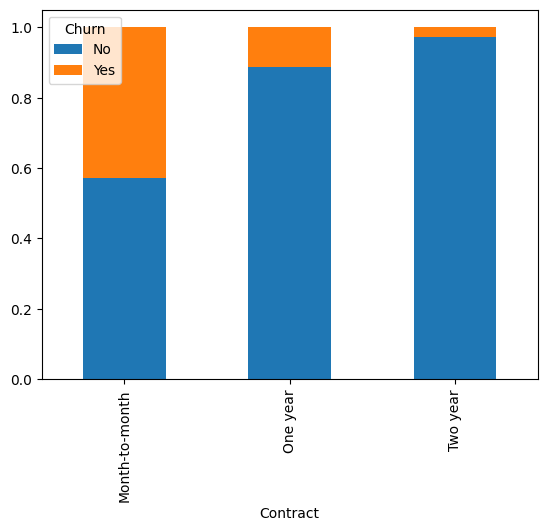

In [14]:
(df_2.groupby('Contract')['Churn'].value_counts(normalize=True)
.unstack('Churn')
.plot.bar(stacked=True))

In [15]:
def plot_cat_feature_dist(feature_name):
  (df_2.groupby(feature_name)['Churn'].value_counts(normalize=True)
  .unstack('Churn')
  .plot.bar(stacked=True))

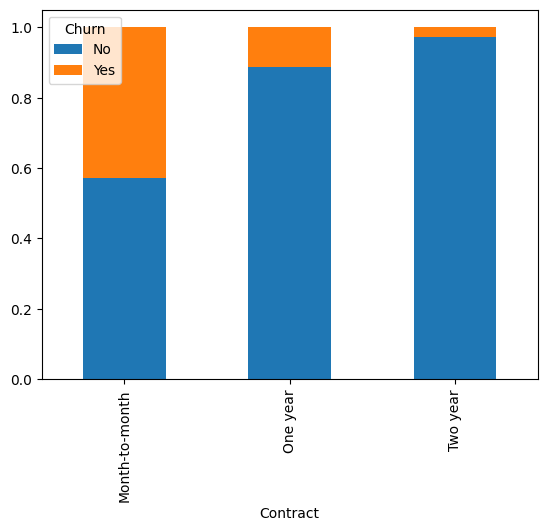

In [16]:
plot_cat_feature_dist('Contract')

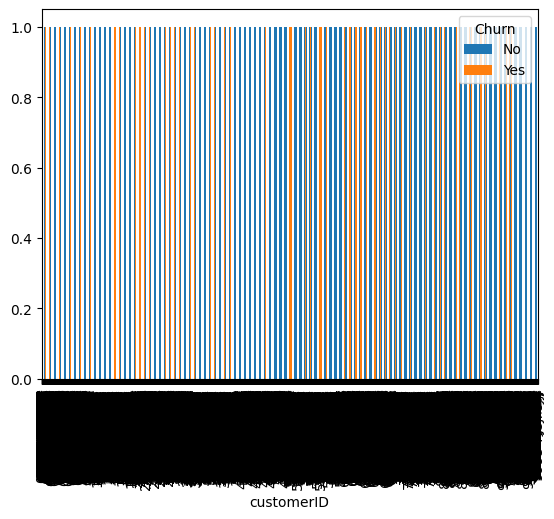

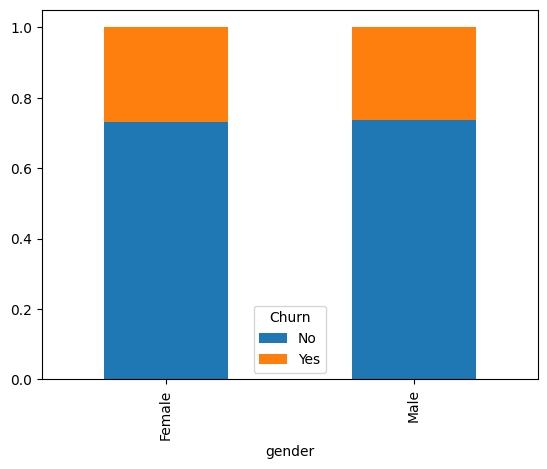

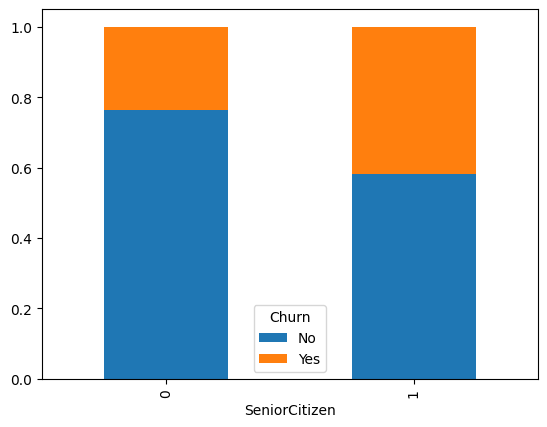

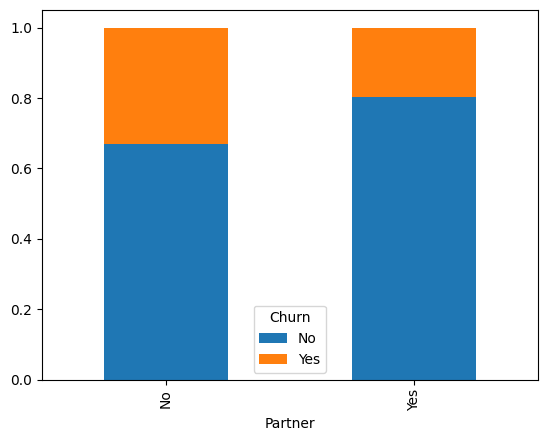

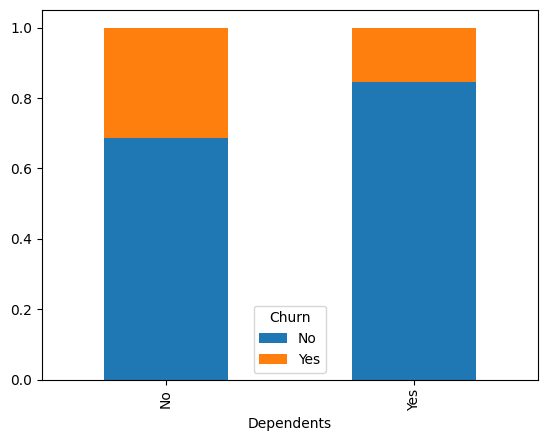

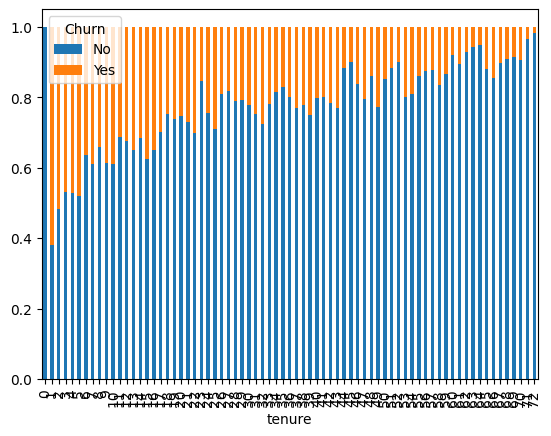

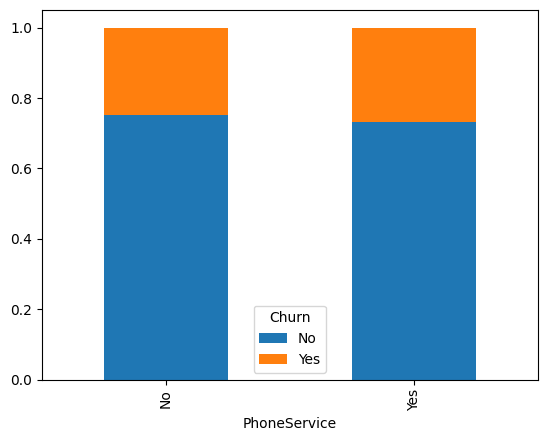

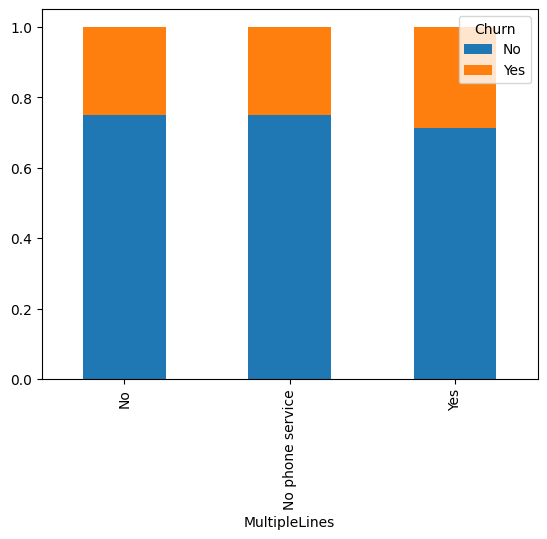

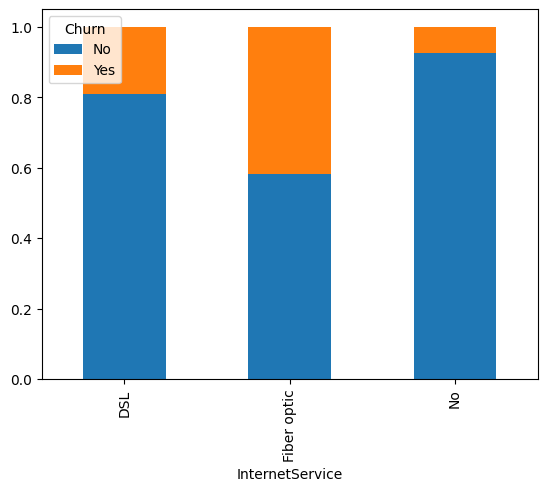

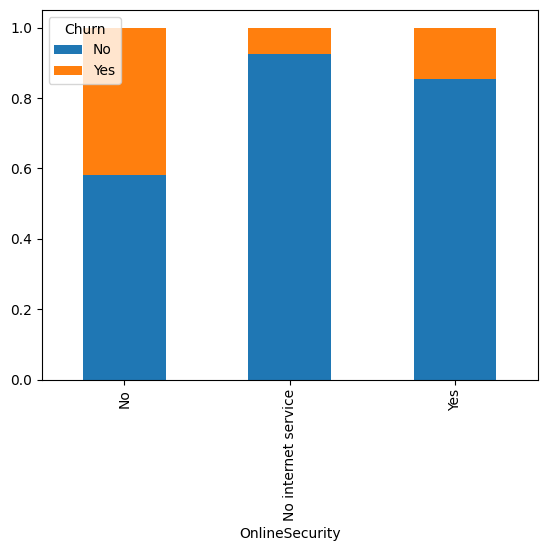

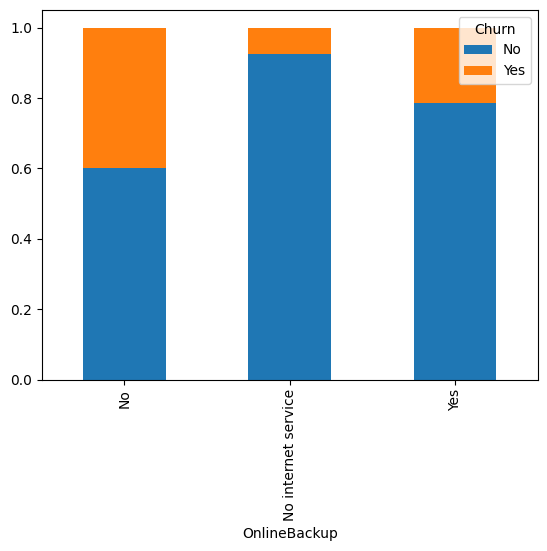

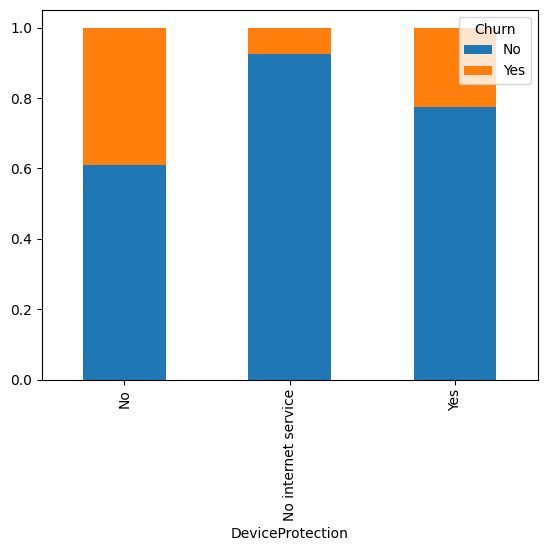

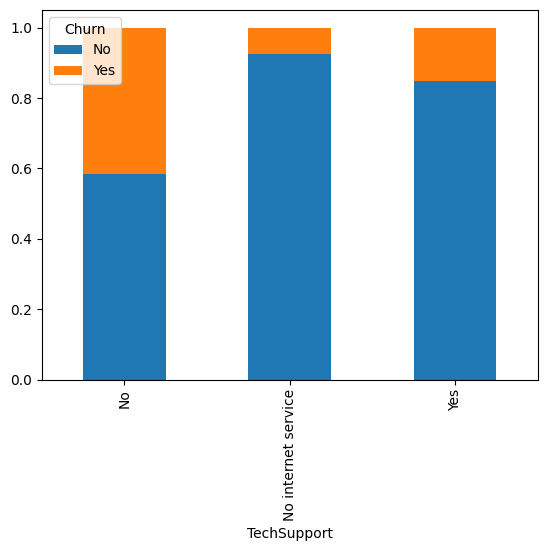

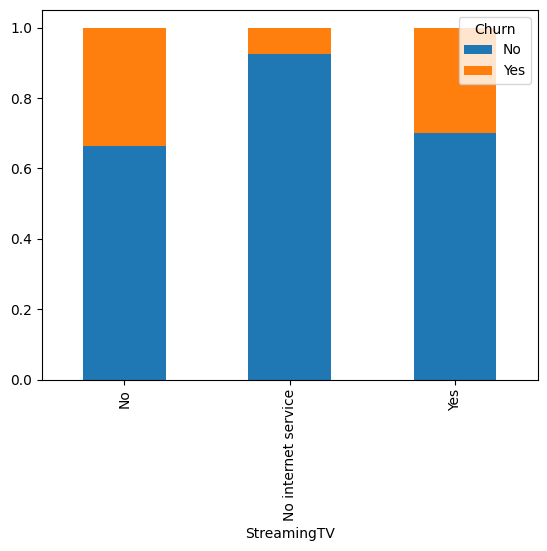

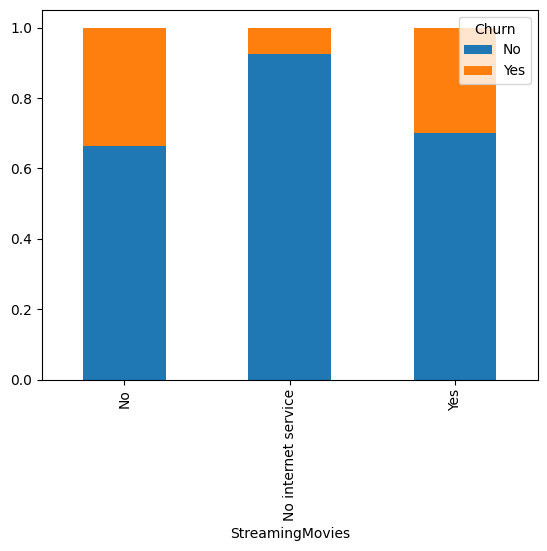

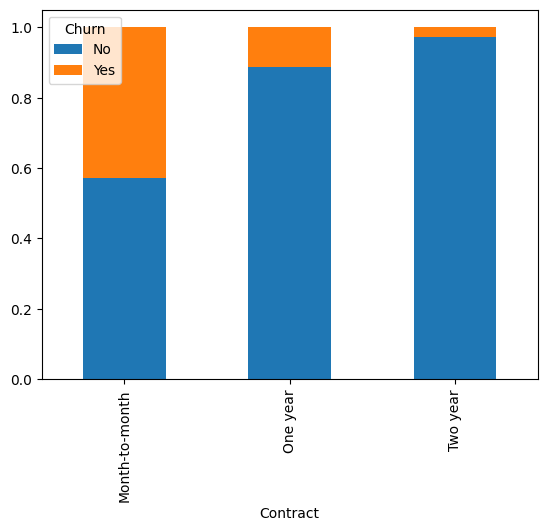

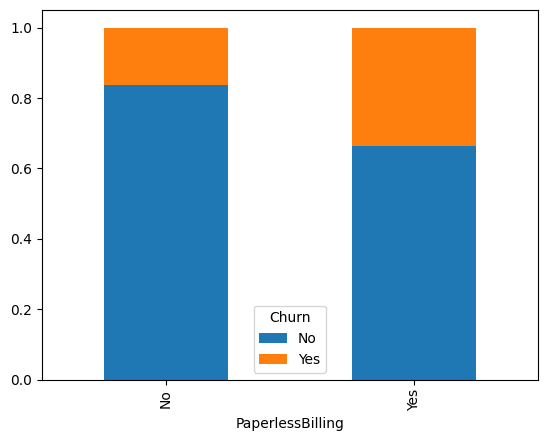

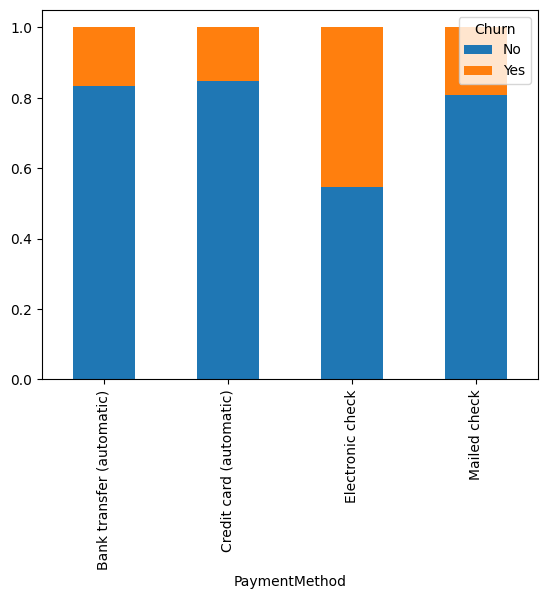

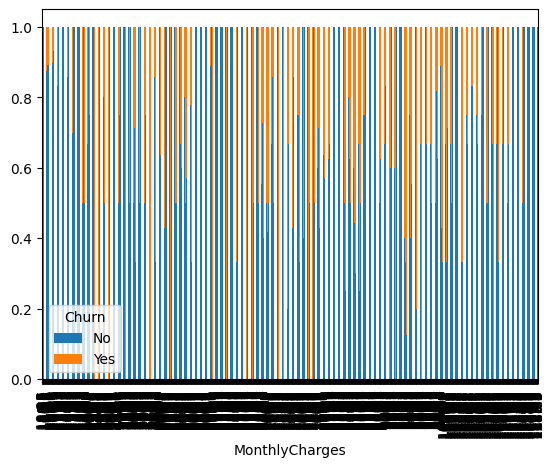

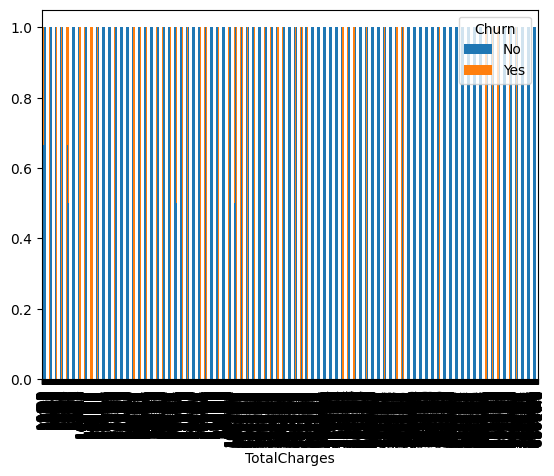

In [17]:
for name in df_2.columns :
  if name == 'Churn': continue
  plot_cat_feature_dist(name)

In [18]:
df_2['AvgMonthlyCharge'] = df_2['TotalCharges'] / df_2['tenure']
df_2['DiffCharges'] = df_2['MonthlyCharges'] - df_2['AvgMonthlyCharge']
df_2['DiffCharges'].describe()

,DiffCharges
count,7032.000000
mean,-0.001215
std,2.616165
min,-18.900000
25%,-1.160179
50%,0.000000
75%,1.147775
max,19.125000


In [19]:
df_2['AvgMonthlyCharge'] = (df_2['TotalCharges'].div(df_2['tenure'])
.replace(np.nan, 0))
df_2['DiffCharges'] = df_2['MonthlyCharges'] - df_2['AvgMonthlyCharge']
df_2['DiffCharges'].describe()

,DiffCharges
count,7043.000000
mean,0.063475
std,3.211815
min,-18.900000
25%,-1.159091
50%,0.000000
75%,1.154880
max,80.850000


<ipython-input-15-34efcaa9ba14>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df_2.groupby(feature_name)['Churn'].value_counts(normalize=True)


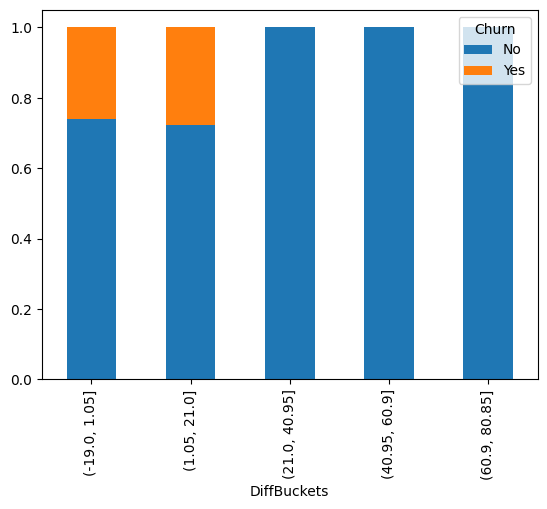

In [20]:
df_2['DiffBuckets'] = pd.cut(df_2['DiffCharges'], bins=5)
plot_cat_feature_dist('DiffBuckets')

<ipython-input-15-34efcaa9ba14>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df_2.groupby(feature_name)['Churn'].value_counts(normalize=True)


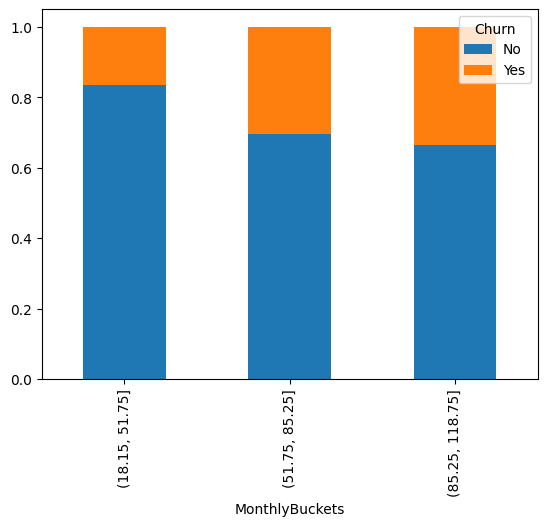

In [21]:
df_2['MonthlyBuckets'] = pd.cut(df_2['MonthlyCharges'], bins=3)
plot_cat_feature_dist('MonthlyBuckets')

<ipython-input-15-34efcaa9ba14>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df_2.groupby(feature_name)['Churn'].value_counts(normalize=True)


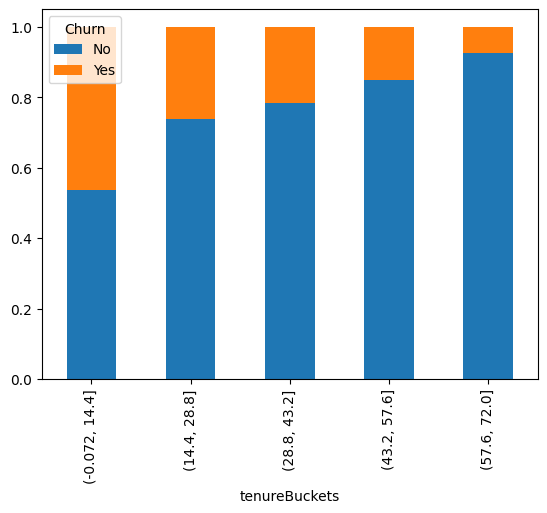

In [22]:
df_2['tenureBuckets'] = pd.cut(df_2['tenure'], bins=5)
plot_cat_feature_dist('tenureBuckets')

<ipython-input-15-34efcaa9ba14>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df_2.groupby(feature_name)['Churn'].value_counts(normalize=True)


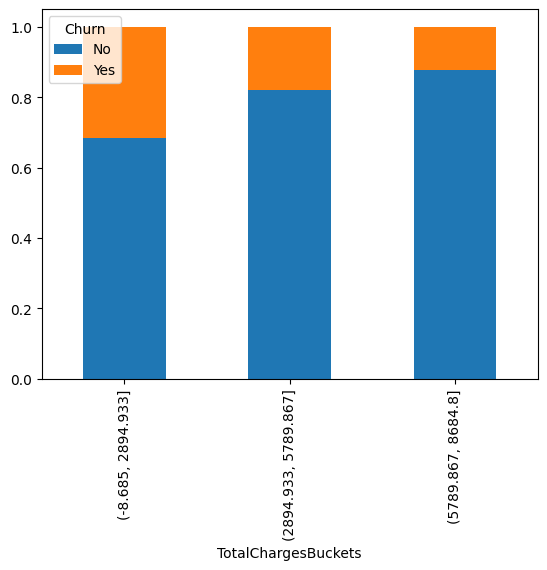

In [23]:
df_2['TotalChargesBuckets'] = pd.cut(df_2['TotalCharges'], bins=3)
plot_cat_feature_dist('TotalChargesBuckets')

In [24]:
df_3 = df_2.copy()
df_3 = df_3.drop(columns=['gender', 'StreamingTV', 'StreamingMovies', 'PhoneService'])
df_3.columns

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'AvgMonthlyCharge', 'DiffCharges', 'DiffBuckets', 'MonthlyBuckets',
       'tenureBuckets', 'TotalChargesBuckets'],
      dtype='object')

In [25]:
df_3 = df_3.drop(columns=['TotalCharges', 'AvgMonthlyCharge', 'DiffCharges', 'MonthlyBuckets', 'tenureBuckets','TotalChargesBuckets'])
df_3.columns

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn', 'DiffBuckets'],
      dtype='object')

In [26]:
df_3 = df_3.drop(columns=['customerID'])

In [27]:
df_3.dtypes

,0
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object
DeviceProtection,object
TechSupport,object


In [28]:
#df_3 = df_3.drop(columns=['MothlyBuckets'])

In [29]:
df_3.dtypes

,0
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object
DeviceProtection,object
TechSupport,object


In [30]:
df_prep = df_3.replace('No internet service', 'No')

In [31]:
df_prep[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']].nunique()

,0
OnlineSecurity,2
OnlineBackup,2
DeviceProtection,2
TechSupport,2


In [32]:
from sklearn.preprocessing import OneHotEncoder

numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
categorical_columns = ['Partner', 'Dependents',
                       'InternetService','OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'Contract', 'PaperlessBilling',
                       'PaymentMethod', 'DiffBuckets']

X_num = df_prep[numeric_columns]
X_cat = df_prep[categorical_columns]

ohe = OneHotEncoder(drop='if_binary')
X_cat_trans = ohe.fit_transform(X_cat)

In [33]:
X_cat_trans.toarray()[0]
ohe.inverse_transform(X_cat_trans.toarray())[0]

array(['Yes', 'No', 'DSL', 'No', 'Yes', 'No', 'No', 'Month-to-month',
       'Yes', 'Electronic check', Interval(-19.0, 1.05, closed='right')],
      dtype=object)

In [34]:
X = np.concatenate((X_num.values, X_cat_trans.toarray()), axis=1)
y = df_prep['Churn'].values

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=113)
X_train.shape

(5634, 25)

In [36]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
cls.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_train)
cls = LogisticRegression()
cls.fit(x_train_scaled, y_train)

LogisticRegression()

In [38]:
X_test_scaled = scaler.transform(X_test)
cls.score(X_test_scaled, y_test)

0.7991483321504613

In [39]:
from sklearn.metrics import confusion_matrix
y_pred = cls.predict(X_test_scaled)
confusion_matrix(y_test, y_pred, labels=['Yes', 'No'])

array([[185, 187],
       [ 96, 941]])

In [40]:
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y_test, y_pred, labels=['Yes','No'], pos_label='Yes'))
print("Recall:", recall_score(y_test, y_pred, labels=['Yes','No'], pos_label='Yes'))

Precision: 0.6583629893238434
Recall: 0.49731182795698925


In [41]:
import json
example = json.loads("""{"customerID": "7090-HPOJU", "gender":"Female",
                  "SeniorCitizen": 0, "Partner":"Yes", "Dependents":"Yes","tenure":66,
                  "PhoneService":"Yes", "MultipleLines":"Yes", "InternetService":"DSL",
                  "OnlineSecurity":"Yes", "OnlineBackup":"Yes","DeviceProtection":"Yes",
                  "TechSupport":"No", "StreamingTV":"No", "StreamingMovies":"No",
                  "Contract":"Month-to-month", "PaperlessBiling":"Yes",
                  "PaymentMethod":"Bank transfer (automatic)", "MonthlyCharges":67.45,
                  "TotalCharges":"4508.65"}""")
ex_df = pd.DataFrame([example])
ex_df['TotalCharges'] = ex_df['TotalCharges'].astype('float64')
ex_df = ex_df.drop(columns=['customerID', 'gender',
                            'StreamingTV', 'StreamingMovies', 'PhoneService'])

ex_df['AvgMonthlyCharge'] = ex_df['TotalCharges'] / ex_df['tenure']
ex_df['DiffCharges'] = ex_df['MonthlyCharges'] - ex_df['AvgMonthlyCharge']
ex_df['DiffBuckets'] = pd.cut(ex_df['DiffCharges'],
                              bins=[-18.938, -11.296, -3.69,3.915, 11.52,19.125])

ex_df.pop('DiffCharges')

numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
categorical_columns = ['Partner', 'Dependents',
                       #'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'Contract',
                       'PaperlessBilling', 'PaymentMethod', 'DiffBuckets']

X_num = df_prep[numeric_columns]
X_cat = df_prep[categorical_columns]

X_cat_trans = ohe.transform(X_cat)
X = np.concatenate((X_num.values, X_cat_trans.toarray()), axis=1)
X_scaled = scaler.transform(X)

cls.predict(X)

array(['Yes', 'No', 'Yes', ..., 'Yes', 'Yes', 'No'], dtype=object)

In [42]:
def custom_predict_routine(example):
  # insert the code from above, indented once
  return cls.predict(X)


import joblib
joblib.dump(cls, 'filename.joblib')
cls = joblib.load('filename.joblib')

In [43]:
def transform_fn(df):
  df = df.replace({'TotalCharges':{'' : 0.0}})
  df = df.astype({'TotalCharges':'float64'})

  df['AvgMonthlyCharge'] = df['TotalCharges'].div(df['tenure'], fill_values=0.0)
  df['DiffCharges'] = df['MonthlyCharges'] - df['AvgMonthlyCharge']

  df['DiffBuckets'] = pd.ccut(df['DiffCharges'], bins=5)

  df = df.drop(columns=['AvgMonthlyCharge', 'gender', 'StreamingTV',
                        'StreamingMovies', 'PhoneService',
                        'customerID', 'DiffCharges'])
  return df

numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
categorical_columns = ['Partner', 'Dependents', 'MultipleLines',
                       'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'Contact',
                       'PaerlessBilling', 'PaymentMethod',
                       'DiffBuckets']

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

fn_transformer = FunctionTransformer(transform_fn)
col_transformer = ColumnTransformer(
    [('ohe', OneHotEncoder(drop='if_binary'), categorical_columns),
     ('sca', MinMaxScaler(), numeric_columns)])
model = LogisticRegression()

from sklearn.pipeline import Pipeline
pipe = Pipeline([('preproc', fn_transformer),
                 ('col_trans', col_transformer),
                 ('model', model)])

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.fit_transform(y_test)

le.inverse_transform([1])

array(['Yes'], dtype=object)

In [53]:
import tensorflow as tf
import tensorflow.keras as keras

train_dataset = (tf.data.Dataset.from_tensor_slices((x_train_scaled, y_train_enc)).batch(128))
test_dataset = (tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_enc)).batch(128))

In [58]:
model = keras.Sequential(
    [ keras.layers.Dense(
        units=64, input_shape=(28,), activation="relu",
        name="input_layer1"),
      keras.layers.Dense(units=32, activation='relu',
                         name='hidden_1'),
      keras.layers.Dense(units=16, activation='relu',
                         name='hidden_2'),
      keras.layers.Dense(units=1, activation='sigmoid',
                         name='output'),
      ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
loss_fn = keras.losses.BinaryCrossentropy()
metrics = [tf.keras.metrics.BinaryAccuracy(),
           tf.keras.metrics.Precision(),
           tf.keras.metrics.Recall()]

model.compile(optimizer='adam', loss=loss_fn, metrics=metrics)